In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/DM proj csv.csv')

# **Exploring the dataset**

In [ ]:
df.shape

(307, 14)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca            int64
thal        float64
target        int64
dtype: object

In [ ]:
# Returns the first x number of rows when head(x). Without a number it returns 5
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0,1.0,1
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0,2.0,1
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0,2.0,1
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0,2.0,1
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0,2.0,1


In [ ]:
# Returns the last x number of rows when tail(x). Without a number it returns 5
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
302,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0,3.0,0
303,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2,3.0,0
304,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1,3.0,0
305,57.0,0.0,1.0,130.0,236.0,0.0,0.0,174.0,0.0,0.0,1.0,1,2.0,0
306,45.0,NaN,3.0,110.0,252.0,0.0,1.0,176.0,1.0,1.8,2.0,0,NaN,0


In [ ]:
# Returns true for a column having null values, else false
df.isnull().any()

age          True
sex          True
cp           True
trestbps     True
chol         True
fbs          True
restecg      True
thalach      True
exang        True
oldpeak      True
slope        True
ca          False
thal         True
target      False
dtype: bool

In [ ]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       305 non-null    float64
 1   sex       305 non-null    float64
 2   cp        306 non-null    float64
 3   trestbps  306 non-null    float64
 4   chol      305 non-null    float64
 5   fbs       306 non-null    float64
 6   restecg   306 non-null    float64
 7   thalach   306 non-null    float64
 8   exang     305 non-null    float64
 9   oldpeak   305 non-null    float64
 10  slope     305 non-null    float64
 11  ca        307 non-null    int64  
 12  thal      304 non-null    float64
 13  target    307 non-null    int64  
dtypes: float64(12), int64(2)
memory usage: 33.7 KB


In [ ]:
df = df.dropna()
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [ ]:
# Returns basic statistics on numeric columns
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **Data Visualization**

<ipython-input-32-fdfb3b84688d>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  g = df.hist(ax=ax)


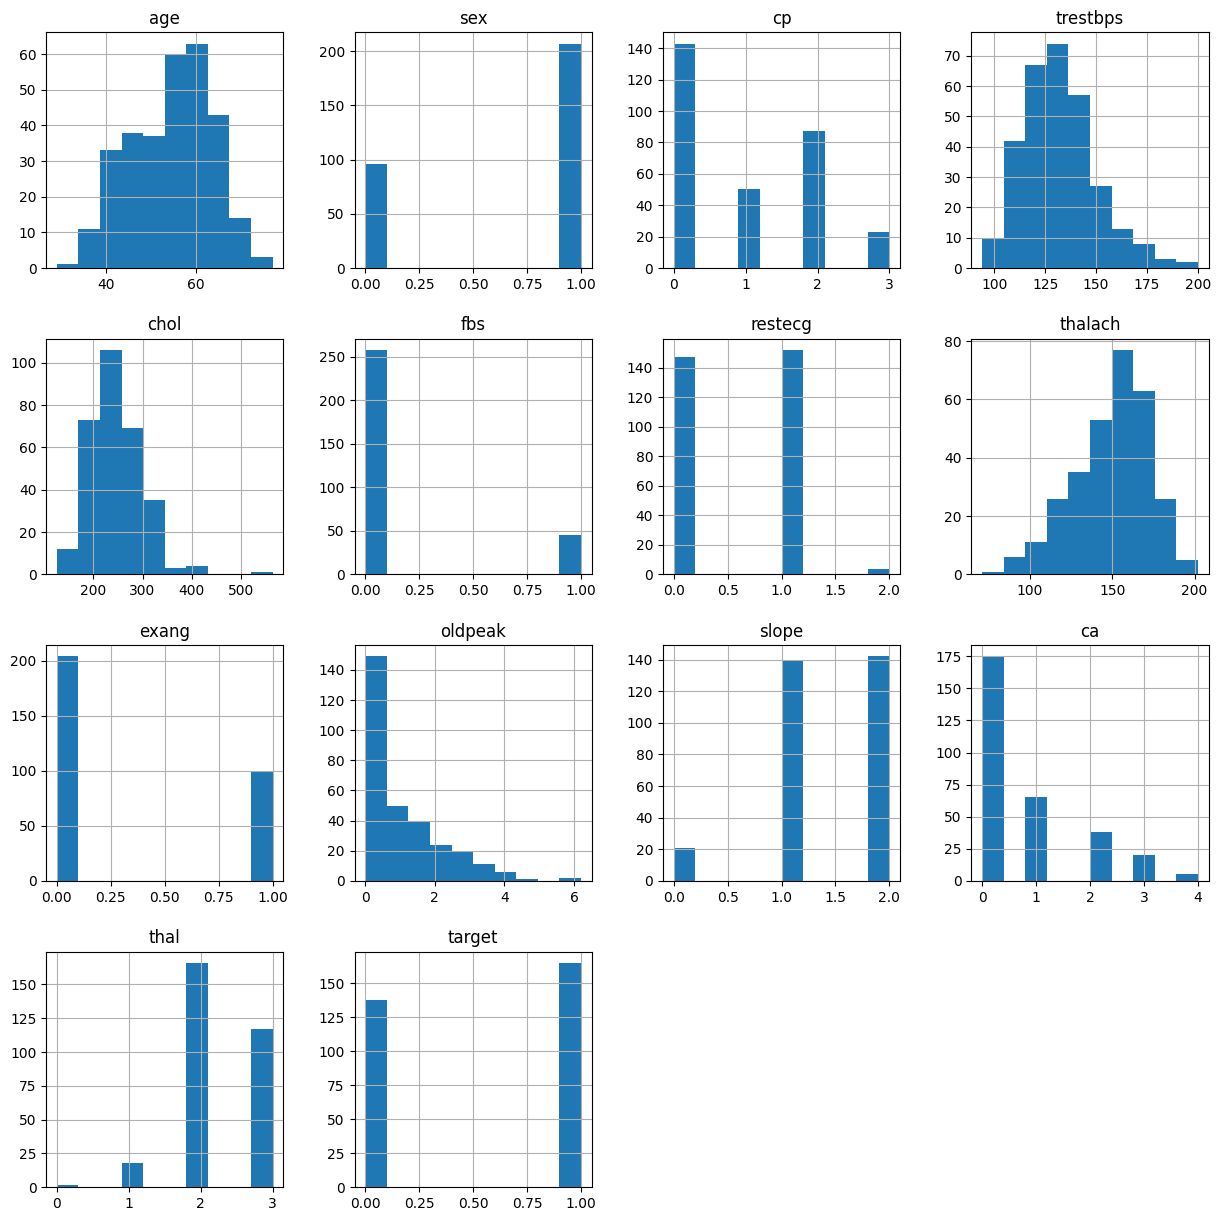

In [ ]:
# Plotting histogram for the entire dataset
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = df.hist(ax=ax)

Text(0, 0.5, 'Count')

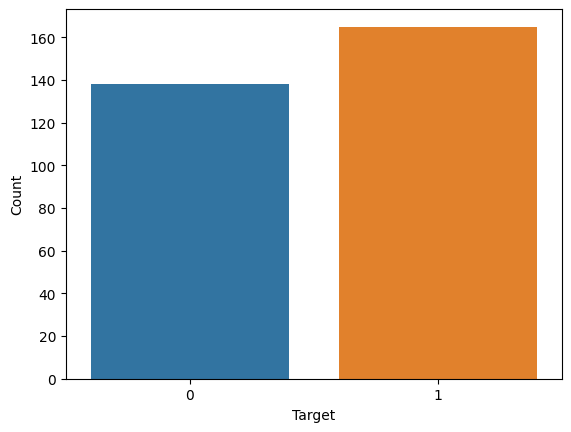

In [ ]:
# Visualization to check if the dataset is balanced or not
g = sns.countplot(x='target', data=df)
plt.xlabel('Target')
plt.ylabel('Count')

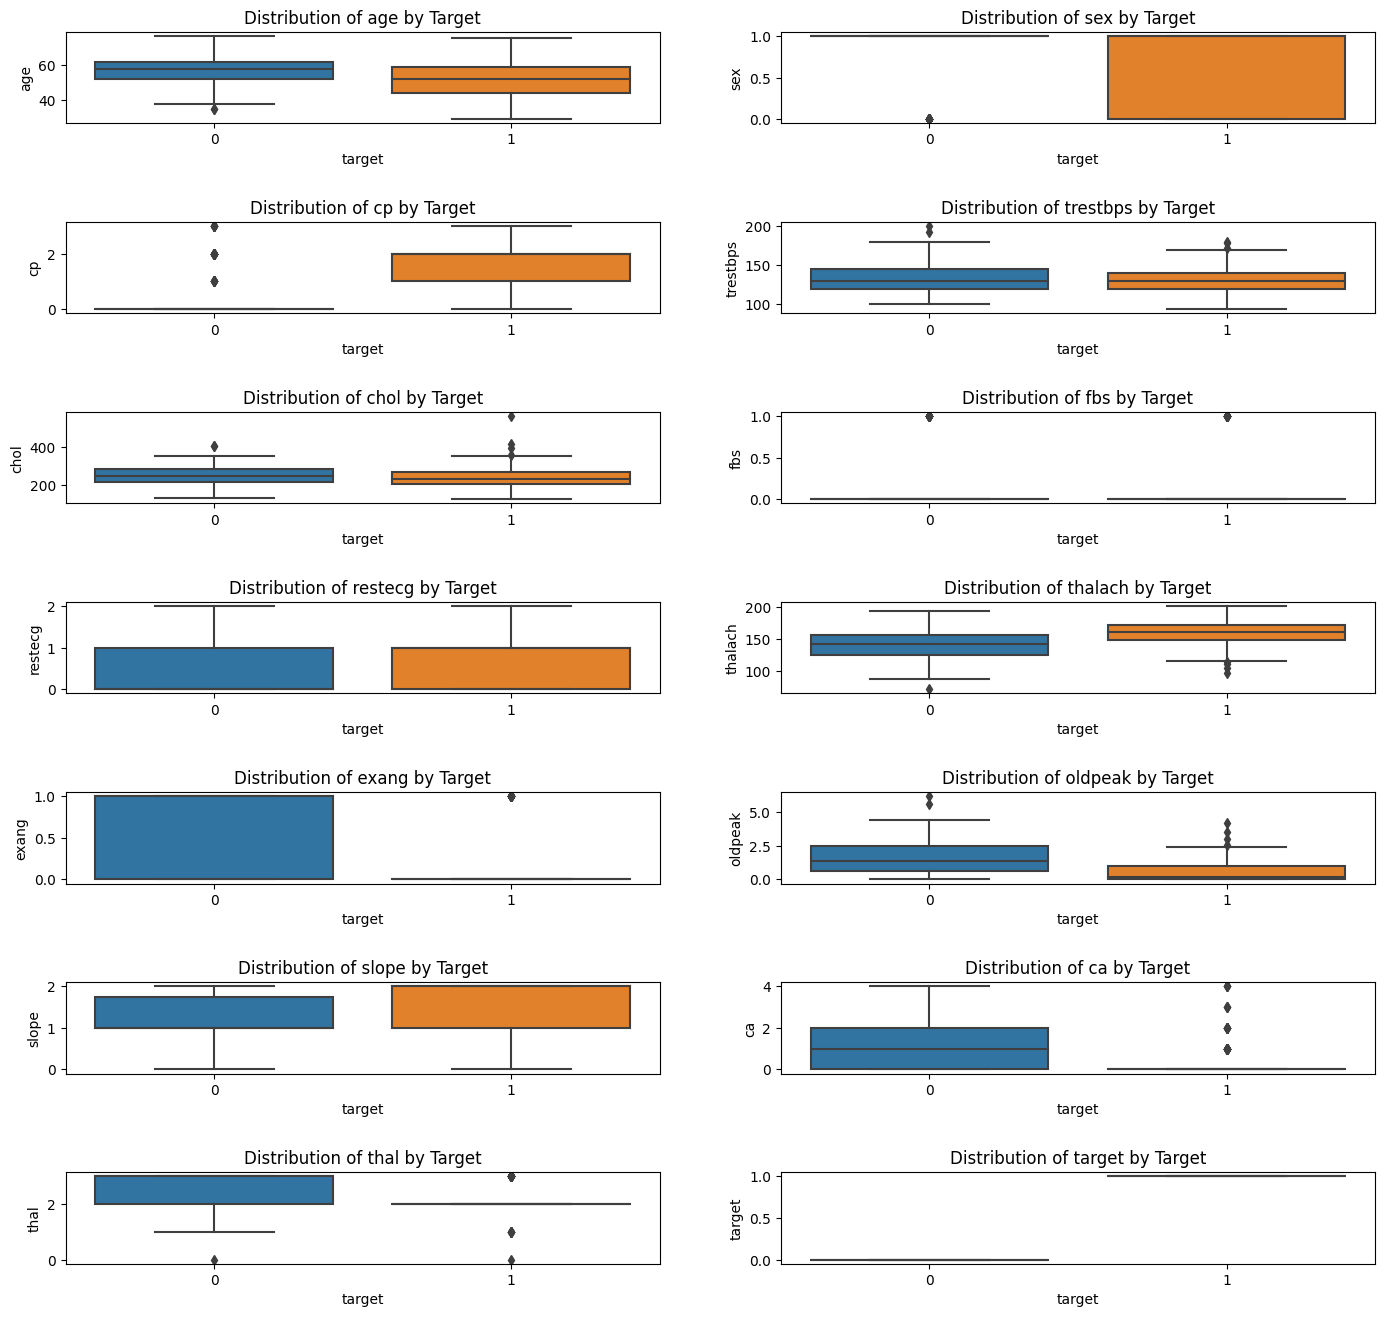

In [ ]:
# Adding boxplots for all numerical variables by the target variable
fig, axes = plt.subplots(nrows=len(df.columns)//2, ncols=2, figsize=(15, 2 * len(df.columns)//2))
fig.tight_layout(pad=5.0)

for i, column in enumerate(df.columns):
    row, col = i // 2, i % 2
    sns.boxplot(x='target', y=column, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column} by Target')

plt.show()


# **Feature Engineering**

### Feature Selection

<Axes: >

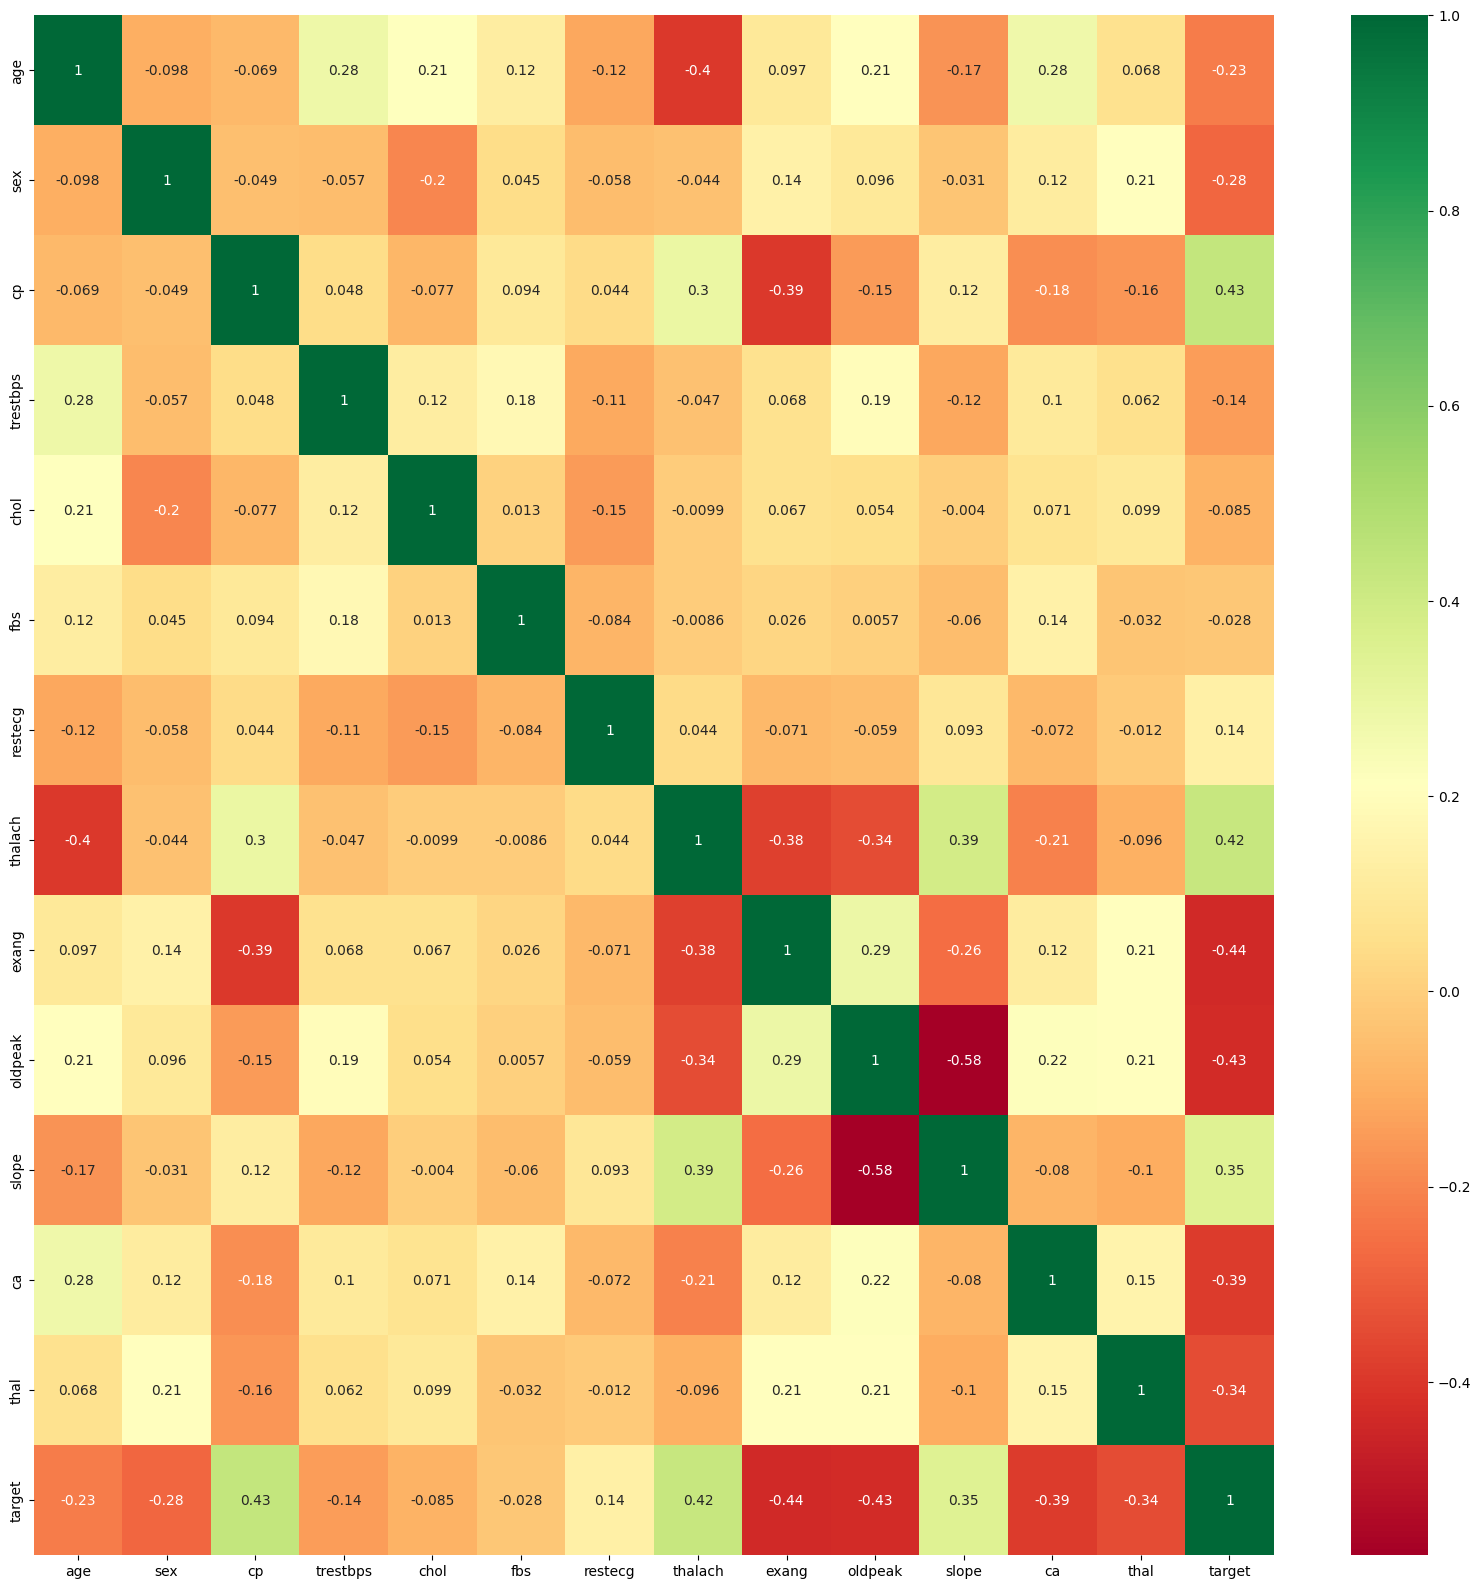

In [ ]:
# Selecting correlated features using Heatmap

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

# **Data Preprocessing**

## Handling categorical features

After exploring the dataset, I observed that converting the categorical variables into dummy variables using 'get_dummies()'. Though we don't have any strings in our dataset it is necessary to convert ('sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal') these features.

*Example: Consider the 'sex' column, it is a binary feature which has 0's and 1's as its values. Keeping it as it is would lead the algorithm to think 0 is lower value and 1 is a higher value, which should not be the case since the gender cannot be ordinal feature.*

In [ ]:
dataset = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

## Feature Scaling

In [ ]:
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0.0',
       'sex_1.0', 'cp_0.0', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'fbs_0.0', 'fbs_1.0',
       'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_0.0', 'exang_1.0',
       'slope_0.0', 'slope_1.0', 'slope_2.0', 'ca_0', 'ca_1', 'ca_2', 'ca_3',
       'ca_4', 'thal_0.0', 'thal_1.0', 'thal_2.0', 'thal_3.0'],
      dtype='object')

In [ ]:
standScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standScaler.fit_transform(dataset[columns_to_scale])

In [ ]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0.0,sex_1.0,cp_0.0,cp_1.0,...,slope_2.0,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0.0,thal_1.0,thal_2.0,thal_3.0
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [ ]:
# Splitting the dataset into dependent and independent features
X = dataset.drop('target', axis=1)
y = dataset['target']

# **Model Building**

We have experimented with 6 algorithms:
1. KNeighbors Classifier
2. Decision Tree Classifier
3. Random Forest Classifier
4. Logistic Regresion
5. Support Vector Machines
6. Neural Networks

## KNeighbors Classifier Model

In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = 'target'

X = df[features]
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
predictions = knn.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, predictions)*100
print(f'Accuracy: {accuracy}')

# Display additional metrics
print('Classification Report:\n', classification_report(y_test, predictions))


Accuracy: 65.57377049180327
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.69      0.66        29
           1       0.69      0.62      0.66        32

    accuracy                           0.66        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.66      0.66      0.66        61



## Decision Tree Classifier

In [ ]:
# Importing essential libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# Finding the best accuracy for decision tree algorithm using cross_val_score
decision_scores = []
for i in range(1, 11):
  decision_classifier = DecisionTreeClassifier(max_depth=i)
  cvs_scores = cross_val_score(decision_classifier, X, y, cv=10)
  decision_scores.append(round(cvs_scores.mean(),3))

for i, score in enumerate(decision_scores):
  print(f"The score at depth {i+1} is: {score}")

The score at depth 1 is: 0.722
The score at depth 2 is: 0.749
The score at depth 3 is: 0.808
The score at depth 4 is: 0.762
The score at depth 5 is: 0.768
The score at depth 6 is: 0.765
The score at depth 7 is: 0.768
The score at depth 8 is: 0.752
The score at depth 9 is: 0.778
The score at depth 10 is: 0.785


Text(0.5, 1.0, 'Decision Tree Classifier scores for different depth values')

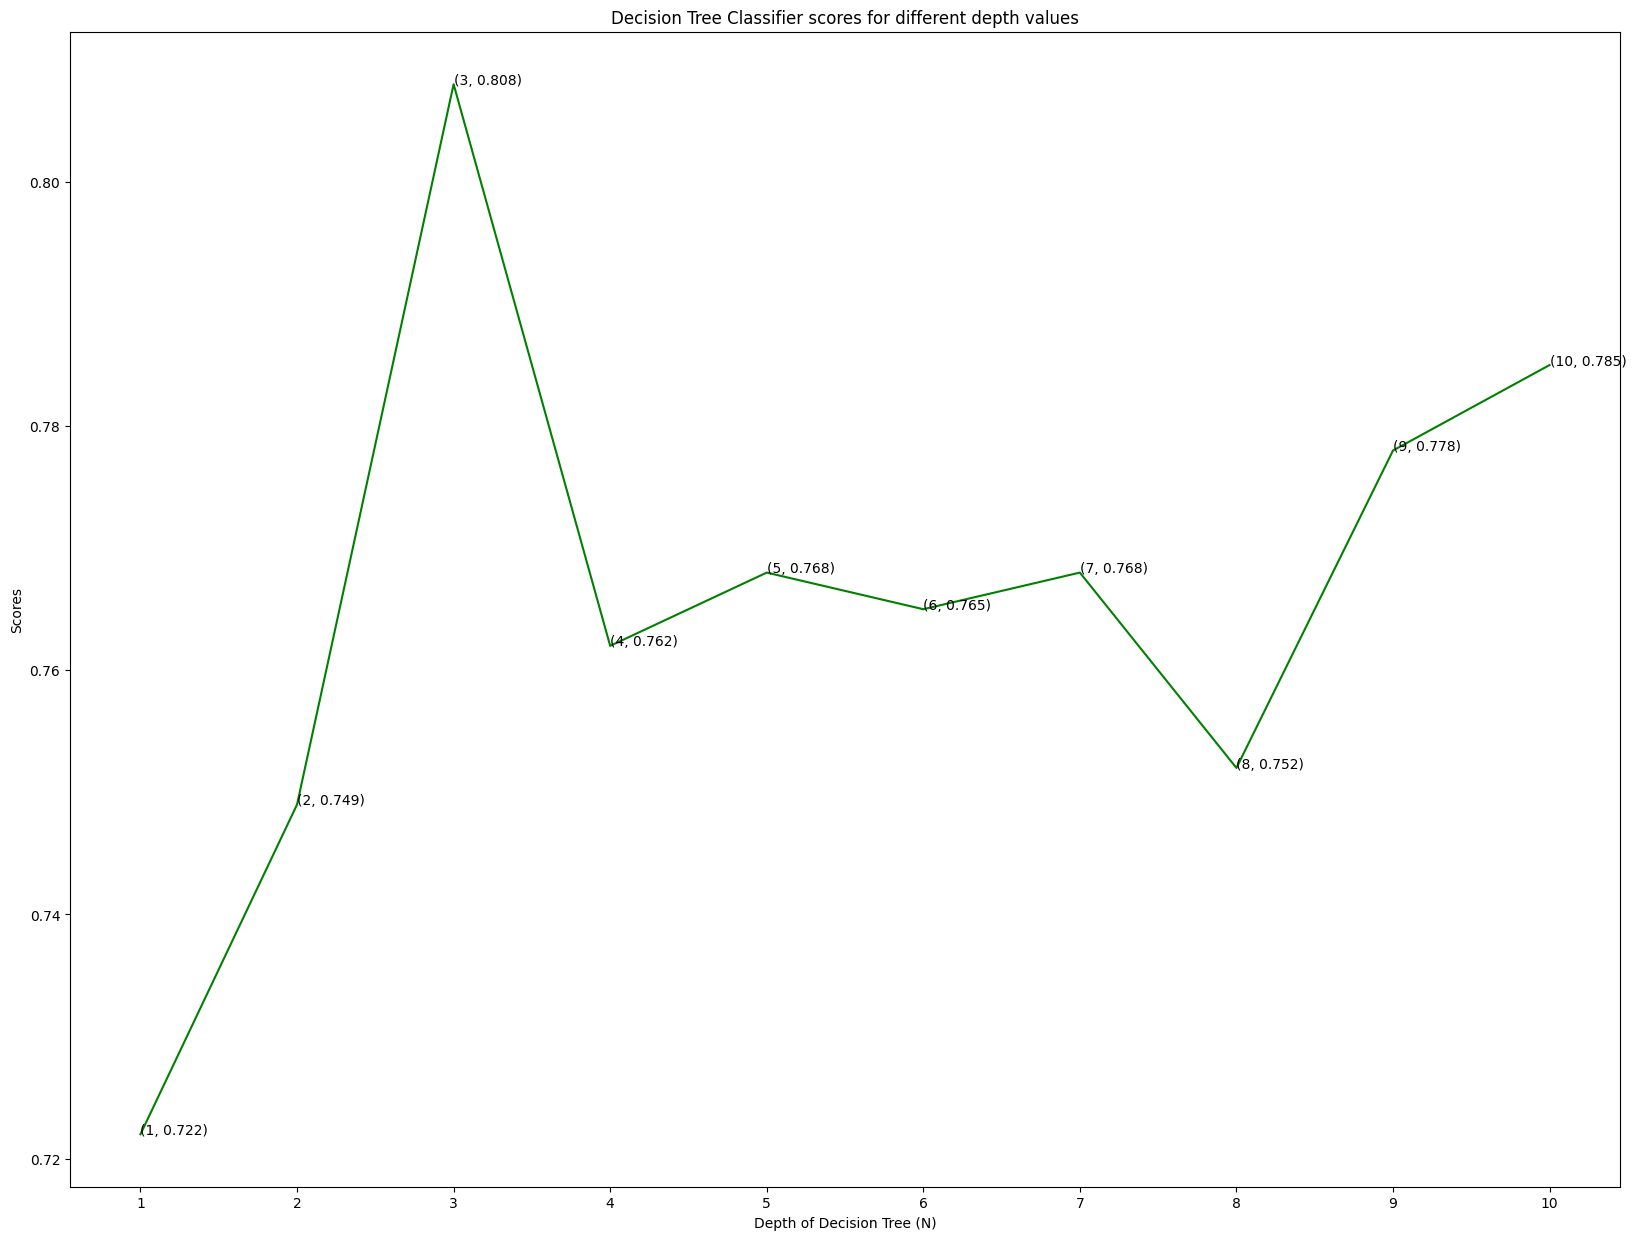

In [ ]:
# Plotting the results of decision_scores
# Plotting the results of decision_scores
plt.figure(figsize=(20,15))
plt.plot([i for i in range(1, 11)], decision_scores, color = 'green')
for i in range(1,11):
    plt.text(i, decision_scores[i-1], (i, decision_scores[i-1]))
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Depth of Decision Tree (N)')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different depth values')


In [ ]:
# Training the decision tree classifier model with max_depth value as 3
decision_classifier = DecisionTreeClassifier(max_depth=3)
cvs_scores = cross_val_score(decision_classifier, X, y, cv=10)
print("Decision Tree Classifier Accuracy with max_depth=3 is: {}%".format(round(cvs_scores.mean(), 4)*100))

Decision Tree Classifier Accuracy with max_depth=3 is: 80.81%


## Random Forest Classifier

In [ ]:
# Importing essential libraries
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Finding the best accuracy for random forest algorithm using cross_val_score
forest_scores = []
for i in range(10, 101, 10):
  forest_classifier = RandomForestClassifier(n_estimators=i)
  cvs_scores = cross_val_score(forest_classifier, X, y, cv=5)
  forest_scores.append(round(cvs_scores.mean(),3))

for i, score in enumerate(forest_scores, start=10):
    print(f"For No. of estimators {i} the score is: {score}")


For No. of estimators 10 the score is: 0.802
For No. of estimators 11 the score is: 0.792
For No. of estimators 12 the score is: 0.805
For No. of estimators 13 the score is: 0.825
For No. of estimators 14 the score is: 0.822
For No. of estimators 15 the score is: 0.815
For No. of estimators 16 the score is: 0.815
For No. of estimators 17 the score is: 0.825
For No. of estimators 18 the score is: 0.822
For No. of estimators 19 the score is: 0.815


Text(0.5, 1.0, 'Random Forest Classifier scores for different N values')

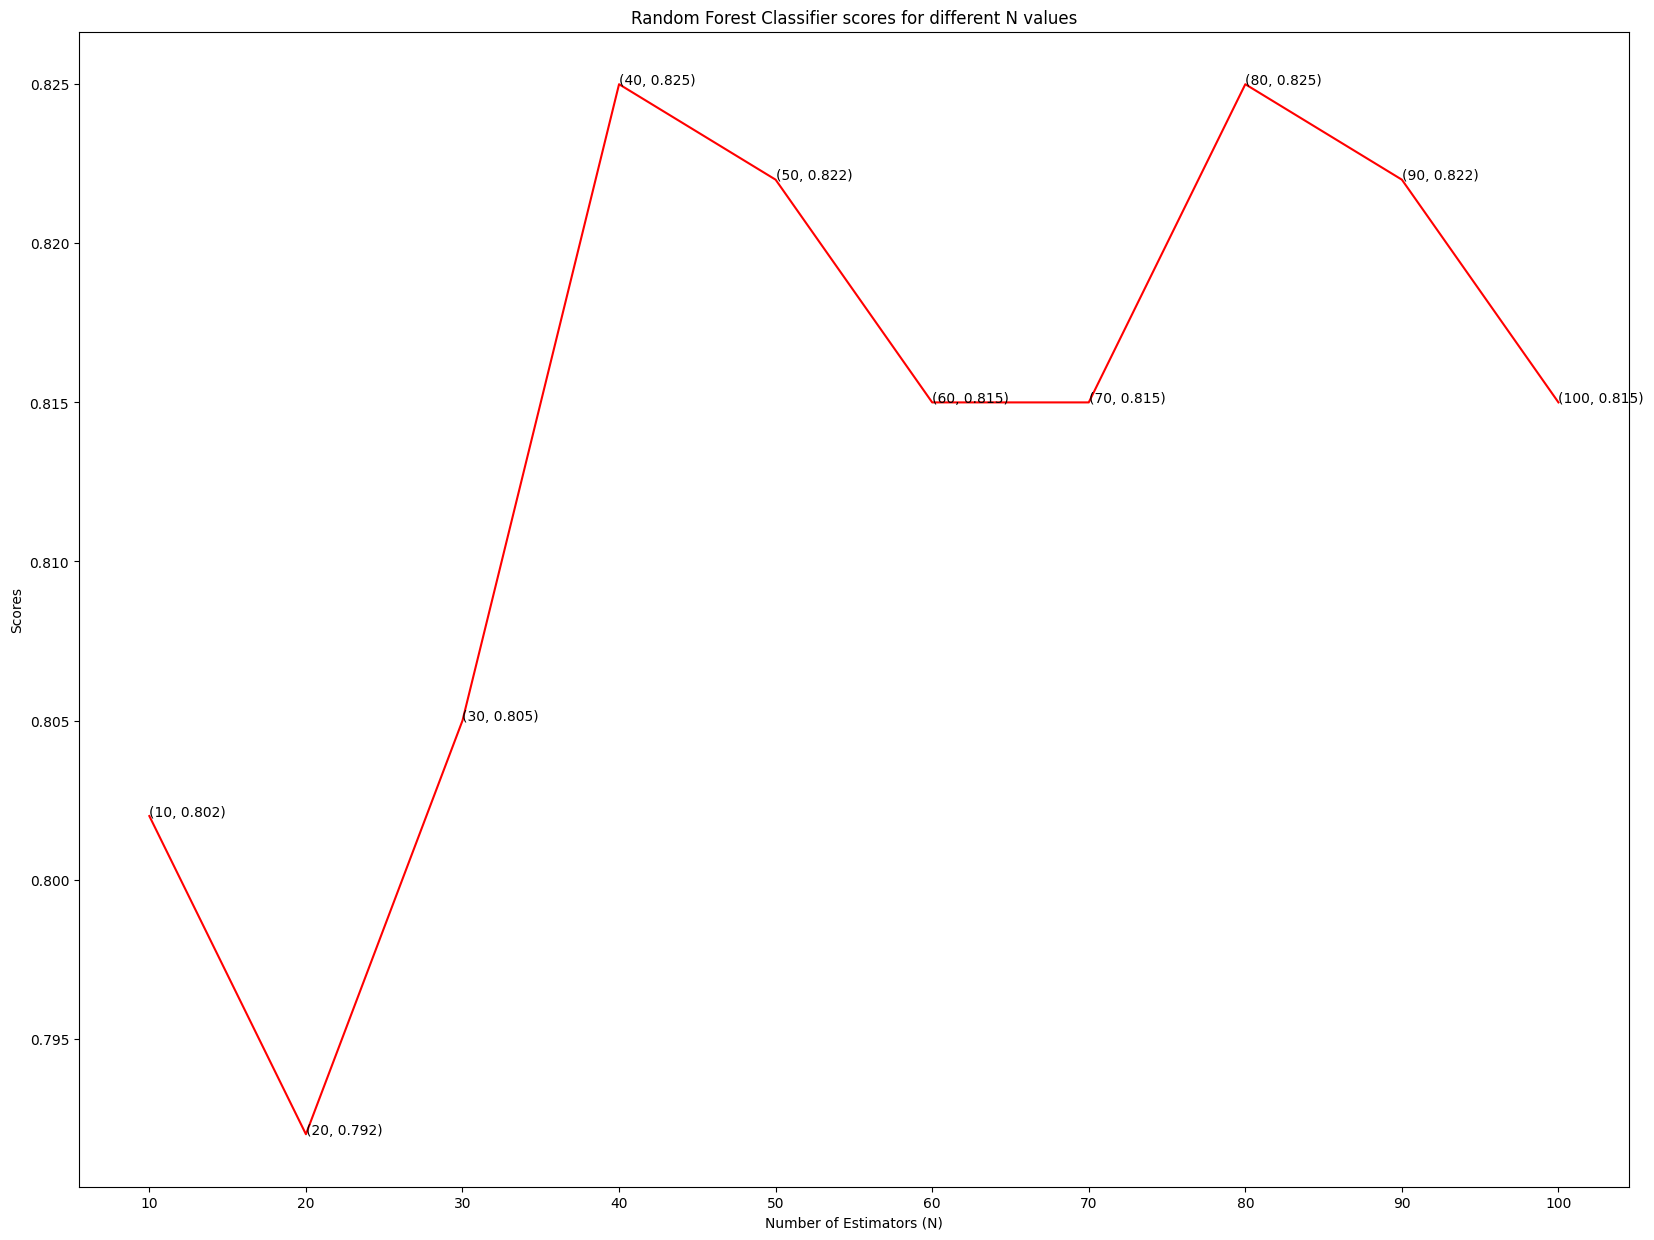

In [ ]:
# Plotting the results of forest_scores
plt.figure(figsize=(20,15))
plt.plot([n for n in range(10, 101, 10)], forest_scores, color = 'red')
for i in range(1,11):
    plt.text(i*10, forest_scores[i-1], (i*10, forest_scores[i-1]))
plt.xticks([i for i in range(10, 101, 10)])
plt.xlabel('Number of Estimators (N)')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different N values')

In [ ]:
# Training the random forest classifier model with n value as 90
forest_classifier = RandomForestClassifier(n_estimators=90)
cvs_scores = cross_val_score(forest_classifier, X, y, cv=5)
print("Random Forest Classifier Accuracy with n_estimators=90 is: {}%".format(round(cvs_scores.mean(), 4)*100))

Random Forest Classifier Accuracy with n_estimators=90 is: 82.48%


## Logistic Regression

In [ ]:
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

X = df.drop('target', axis=1)  # Features
y = df['target']  # Binary target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model with increased max_iter
model = LogisticRegression(max_iter=1000)  # You can adjust the max_iter value as needed

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy*100:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 88.52
Precision: 0.88
Recall: 0.91


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[25  4]
 [ 3 29]]


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Support Vector Machines

In [ ]:
# Importing necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

features = df.drop('target', axis=1)
target = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)  # You can choose different kernels (linear, rbf, poly, etc.) and tune hyperparameters

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
predictions = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy*100}')

# Display additional metrics
print('Classification Report:\n', classification_report(y_test, predictions))
print('Confusion Matrix:\n', confusion_matrix(y_test, predictions))

Accuracy: 86.88524590163934
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:
 [[25  4]
 [ 4 28]]


Neural Network

In [ ]:
# Importing necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

features = df.drop('target', axis=1)
target = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
predictions = (model.predict(X_test) > 0.5).astype('int32')  # Convert probabilities to binary predictions
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy*100}')

# Display additional metrics
print('Classification Report:\n', classification_report(y_test, predictions))

Epoch 1/50
8/8 [==============================] - 1s 35ms/step - loss: 0.6688 - accuracy: 0.5744 - val_loss: 0.6157 - val_accuracy: 0.7541
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6028 - accuracy: 0.7686 - val_loss: 0.5498 - val_accuracy: 0.8525
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 0.5508 - accuracy: 0.8058 - val_loss: 0.4943 - val_accuracy: 0.8689
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5020 - accuracy: 0.8140 - val_loss: 0.4518 - val_accuracy: 0.8852
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.4622 - accuracy: 0.8306 - val_loss: 0.4164 - val_accuracy: 0.8852
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.4257 - accuracy: 0.8388 - val_loss: 0.3908 - val_accuracy: 0.8852
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 0.3950 - accuracy: 0.8306 - val_loss: 0.3744 - val_accuracy: 0.8852
Epoch 8/50
8/8 [================